# Projeto Final | Sistema para Edição de imagens e áudios

<div style="background-color: #f2f2f2; text-align: center; padding: 10px;">
  <h3>Script para Análise dos arquivos de log</h3>
</div>

%------------------------------------------------------------------------------------------------------%<br>
<br>
``Autores:`` Andrea Elias, Anthony Heimlich, Éverton Donato, Julia Midori e Luana Kruger  <br>
<br>
``Instituição:`` ADA Tech<br>
<br>
``Projeto:`` Santander Coders 2023.2<br>
<br>
``Descrição:`` Este código implementa funções para analisar informações contidas nos arquivos de log<br>
<br>
``Repositório GitHub:`` https://github.com/luana-kruger/TP-I_Santander_Coders23  <br>
<br>

%------------------------------------------------------------------------------------------------------%

## Carregar bibliotecas

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Carregar Funções

### Carregar arquivo de log

In [3]:
def carregar_arquivo_log(path):
    return pd.read_csv(path)

### Tempo de processamento médio por tipo (imagem ou áudio)

In [7]:
def tempo_processamento_medio_por_tipo(df):
    return df.groupby('Tipo de Processamento')['Tempo de Processamento'].mean()

### Distribuição do tempo de processamento

In [60]:
def distribuicao_tempo_processamento(df):
    col = 'Tempo de Processamento'
    bins=20
    weight = np.ones(len(df[col])) /len(df[col])

    plt.hist(df[col], bins=bins, weights=weight, edgecolor='black')
    
    plt.gca().set_yticklabels(['{:.1f}%'.format(x*100).replace('.', ',') for x in plt.gca().get_yticks()])
    
    plt.xlabel('Tempo de Processamento (ms)')
    plt.ylabel('Frequência (%)')
    plt.title('Distribuição do Tempo de Processamento')
    plt.show()

### Arquivos com tempo de processamento abaixo da média

In [15]:
def arquivos_abaixo_da_media(df):
    media = df['Tempo de Processamento'].mean()
    return df[df['Tempo de Processamento'] < media]

### Análise de correlação

In [21]:
def analise_correlacao(df):
    return df[['Tamanho do Arquivo', 'Tempo de Processamento']].corr()

### Análise de frequência por tipo de processamento

In [22]:
def analise_frequencia_tipo_processamento(df):
    return df['Tipo de Processamento'].value_counts()

### Análise de erros por tipo de processamento

In [28]:
def analise_erros_por_tipo(df):
    return df.groupby('Tipo de Processamento')['Resultado do Processamento'].value_counts()

## Exemplo de uso

In [4]:
path_image = '..\logs\log_image.csv'
path_audio = '..\logs\log_audio.csv'

# Carregar arquivo de log de imagem
df_imagem = carregar_arquivo_log(path_image)

# Carregar arquivo de log de áudio
# df_audio = carregar_arquivo_log(path_audio)

In [5]:
df_imagem.head(3)

,Data e Hora,Tipo de Processamento,Tempo de Processamento,Nome do Arquivo,Tamanho do Arquivo,Resultado do Processamento,Mensagem de Erro
0,2024-03-09 01:33:25,Carregamento de Imagem,1.165,10043234166_e6dd915111_n.jpg,26.068359,Sucesso,NaN
1,2024-03-09 01:33:25,Zoom de Imagem,40.992,10043234166_e6dd915111_n.jpg,26.068359,Sucesso,NaN
2,2024-03-09 01:33:25,Carregamento de Imagem,0.000,10200780773_c6051a7d71_n.jpg,22.774414,Sucesso,NaN


#### Tempo de processamento médio por tipo - em milissegundos

In [12]:
process_mean = tempo_processamento_medio_por_tipo(df_imagem)
process_mean

Tipo de Processamento
Carregamento de Imagem     1.831226
Deslocamento de Imagem    53.300981
Inversão Horizontal        0.000000
Rotação de Imagem         25.678716
Zoom de Imagem            61.354000
Name: Tempo de Processamento, dtype: float64

#### Distribuição do tempo de processamento

C:\Users\luana\AppData\Local\Temp\ipykernel_13952\2826430714.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.1f}%'.format(x*100).replace('.', ',') for x in plt.gca().get_yticks()])


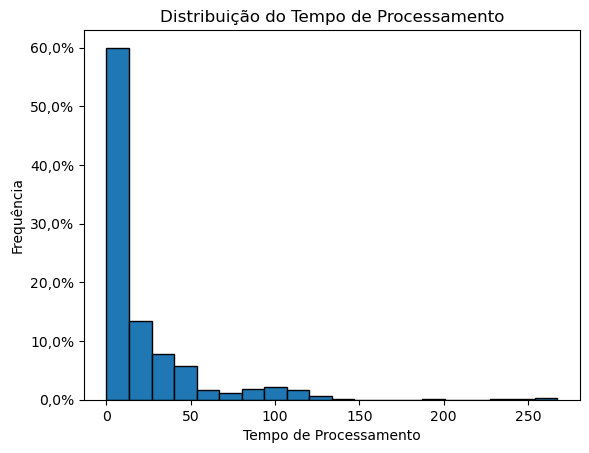

In [51]:
distribuicao_tempo_processamento(df_imagem)

#### Arquivos com tempo de processamento abaixo da média

In [18]:
media = df_imagem['Tempo de Processamento'].mean()
print("Tempo médio de processamento em milissegundos: ", media)

Tempo médio de processamento em milissegundos:  18.087248701673396


In [20]:
arquivos_abaixo_da_media(df_imagem)

,Data e Hora,Tipo de Processamento,Tempo de Processamento,Nome do Arquivo,Tamanho do Arquivo,Resultado do Processamento,Mensagem de Erro
0,2024-03-09 01:33:25,Carregamento de Imagem,1.165,10043234166_e6dd915111_n.jpg,26.068359,Sucesso,NaN
2,2024-03-09 01:33:25,Carregamento de Imagem,0.000,10200780773_c6051a7d71_n.jpg,22.774414,Sucesso,NaN
4,2024-03-09 01:33:25,Carregamento de Imagem,1.000,10294487385_92a0676c7d_m.jpg,21.147461,Sucesso,NaN
6,2024-03-09 01:33:25,Carregamento de Imagem,0.000,10437652486_aa86c14985.jpg,130.642578,Sucesso,NaN
8,2024-03-09 01:33:25,Carregamento de Imagem,1.007,10443973_aeb97513fc_m.jpg,25.536133,Sucesso,NaN
...,...,...,...,...,...,...,...
1790,2024-03-09 01:33:56,Carregamento de Imagem,0.000,98992760_53ed1d26a9.jpg,87.693359,Sucesso,NaN
1791,2024-03-09 01:33:56,Inversão Horizontal,0.000,98992760_53ed1d26a9.jpg,87.693359,Sucesso,NaN
1792,2024-03-09 01:33:56,Carregamento de Imagem,0.000,9939430464_5f5861ebab.jpg,39.317383,Sucesso,NaN
1793,2024-03-09 01:33:56,Inversão Horizontal,0.000,9939430464_5f5861ebab.jpg,39.317383,Sucesso,NaN


#### Comparação de desempenho entre tipos de processamento

In [13]:
process_mean.sort_values()

Tipo de Processamento
Inversão Horizontal        0.000000
Carregamento de Imagem     1.831226
Rotação de Imagem         25.678716
Deslocamento de Imagem    53.300981
Zoom de Imagem            61.354000
Name: Tempo de Processamento, dtype: float64

#### Análise de correlação entre tamanho do arquivo e tempo de processamento 

In [25]:
analise_correlacao(df_imagem)

,Tamanho do Arquivo,Tempo de Processamento
Tamanho do Arquivo,1.000000,0.242122
Tempo de Processamento,0.242122,1.000000


#### Análise de frequência por tipo de processamento 

In [24]:
analise_frequencia_tipo_processamento(df_imagem)

Carregamento de Imagem    898
Rotação de Imagem         242
Deslocamento de Imagem    236
Zoom de Imagem            226
Inversão Horizontal       194
Name: Tipo de Processamento, dtype: int64

#### Análise de erros por tipo de processamento

In [29]:
analise_erros_por_tipo(df_imagem)

Tipo de Processamento   Resultado do Processamento
Carregamento de Imagem  Sucesso                       898
Deslocamento de Imagem  Sucesso                       212
                        Erro                           24
Inversão Horizontal     Sucesso                       194
Rotação de Imagem       Sucesso                       222
                        Erro                           20
Zoom de Imagem          Sucesso                       207
                        Erro                           19
Name: Resultado do Processamento, dtype: int64